In [8]:
import datetime
import json
import os
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rich import print

In [9]:
folder = 'logs'

# Single process log pattern example
log_pattern = 'scenario01_DOCDB_22115_56ca8883.json'
# Multi process log pattern example
log_pattern = 'scenario01_DOCDB_.*_56ca8883.json'

data = {}

def get_folders(folder):
    return [f for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))]

def get_files(folder):
    return [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

boxes = get_folders(folder)
for box in boxes:
    files = get_files(os.path.join(folder, box))
    for file in files:
        if re.match(log_pattern, file):
            print(file)
            with open(os.path.join(folder, box, file), 'r') as f:
                file_data = json.loads(f.read())
                for timestamp in file_data.keys():
                    datetime_str = datetime.datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d %H:%M:%S')                                                                                            
                    if datetime_str not in data.keys():
                        # Add a new entry but make sure no division by 0
                        if file_data[timestamp]['count'] == 0:
                            avg_time = 0
                        else:
                            avg_time = file_data[timestamp]['query_time'] / file_data[timestamp]['count']
                        data[datetime_str] = {
                            'count': file_data[timestamp]['count'],
                            'query_time': file_data[timestamp]['query_time'],
                            'min_time': file_data[timestamp]['min_time'],
                            'max_time': file_data[timestamp]['max_time'],
                            'avg_time': avg_time,
                        }
                    else:
                        # An entry for this time stamp exists update the values
                        data[datetime_str]['count'] += file_data[timestamp]['count']
                        data[datetime_str]['query_time'] += file_data[timestamp]['query_time']                                                
                        if file_data[timestamp]['min_time'] < data[datetime_str]['min_time']:
                            data[datetime_str]['min_time'] = file_data[timestamp]['min_time']                            
                        if file_data[timestamp]['max_time'] > data[datetime_str]['max_time']:
                            data[datetime_str]['max_time'] = file_data[timestamp]['max_time']                        
                        data[datetime_str]['avg_time'] = data[datetime_str]['query_time']/data[datetime_str]['count']


# Order the data by timespamp. This can be usefull if multiple logsfies are used
dataKeys = list(data.keys())
dataKeys.sort()
sortedData = {i: data[i] for i in dataKeys}
data = sortedData

scenario01_DOCDB_22115_56ca8883.json

scenario01_DOCDB_21759_56ca8883.json

scenario01_DOCDB_21845_56ca8883.json

scenario01_DOCDB_21931_56ca8883.json

scenario01_DOCDB_22017_56ca8883.json

scenario01_DOCDB_22213_56ca8883.json

scenario01_DOCDB_22311_56ca8883.json

scenario01_DOCDB_22409_56ca8883.json

<Figure size 640x480 with 0 Axes>

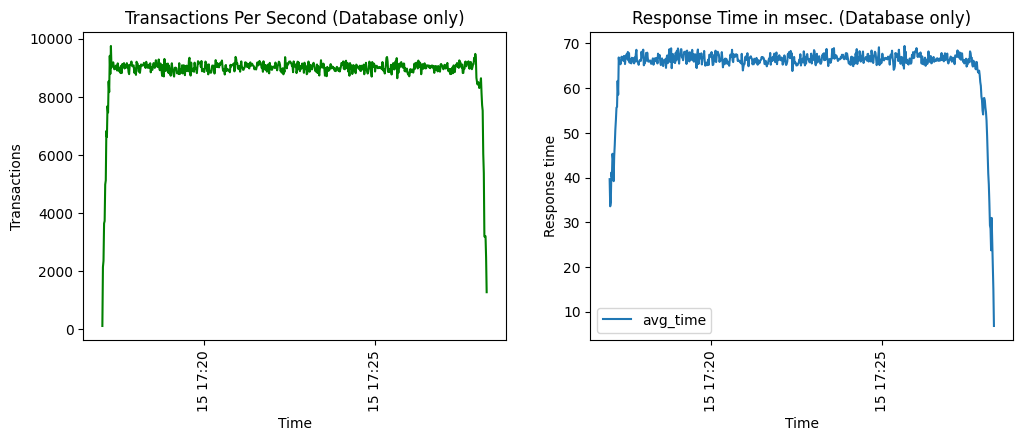

In [10]:
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame.from_dict(data, orient='index')

# Convert the index to a DateTimeIndex
df.index = pd.to_datetime(df.index)

# Create a time series plot with multiple lines
plt.tight_layout()
plt.subplots(1, figsize=(12,4))
plt.clf()
plt.subplot(1, 2, 1)
plt.plot(df.index, df['count'], label='count',color= 'green')
# plt.plot(df.index, df['query_time'], label='query_time')

# Add labels and title
# plt.ylim(0, 20000)
plt.xlabel('Time')
plt.ylabel('Transactions')
plt.title('Transactions Per Second (Database only)')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
# plt.plot(df.index, df['min_time']*1000, label='min_time')
# plt.plot(df.index, df['max_time']*1000, label='max_time')
plt.plot(df.index, df['avg_time']*1000, label='avg_time')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Response time')
plt.title('Response Time in msec. (Database only)')
plt.xticks(rotation=90)

# Show the legend
plt.legend()

# Show the plot
plt.show()